In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Import the dataset

In [2]:
movies = pd.read_csv("dbs/watched_movies_2010s.csv")
trailers = pd.read_csv("dbs/trailers_2010s.csv")
trailers.shape

(4044, 13)

let's figure out how to only keep the relevant trailer information

In [3]:
trailers = trailers.loc[trailers['similarity_score'] > 0]
print(trailers.shape)

(3870, 13)


So we got rid of 174 non-trailers

Now let's get rid of all gameplay trailers, vevo/music videos, and screen junkies

In [4]:
def drop_bad_data(trailers):
    # the (?i) tells the contains method to not match case
    # bad_channels = trailers[trailers['channel_title'].str.contains('(?i)vevo|Screen Junkies|PlayStation|Xbox')] # contains VEVO or contians Screen Junkies or PlayStation
    # bad_titles = trailers[trailers['title'].str.contains('(?i)gameplay|music video|xbox| pc|ps4')]
    # bad_data = pd.concat([bad_channels, bad_titles]).drop_duplicates()
    good_data = trailers[trailers['channel_title'].str.contains('(?i)vevo|Screen Junkies|PlayStation|Xbox')==False]
    good_data = good_data[good_data['title'].str.contains('(?i)gameplay|music video|xbox| pc|ps4')==False]
    return good_data

In [5]:
trailers = drop_bad_data(trailers)
trailers.shape

(3839, 13)

This got rid of 31 trailers

what is the mean, mode, and mediam similarity scores?

In [6]:
print(trailers['similarity_score'].mean())
print(trailers['similarity_score'].mode()[0])
print(trailers['similarity_score'].median())

0.338107432676435
0.25
0.31986531986531985


Text(0, 0.5, 'Similarity Score')

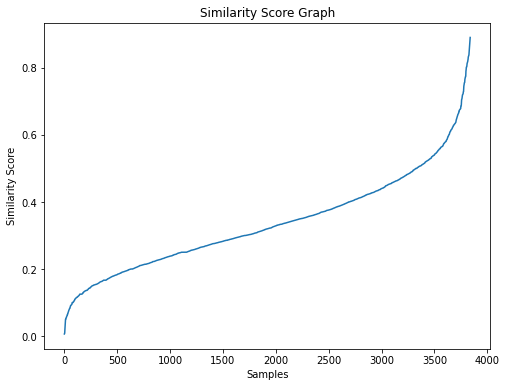

In [7]:
plt.figure(figsize=(8, 6))
plt.plot(trailers[['similarity_score']].sort_values('similarity_score', ascending=True).values)
plt.title("Similarity Score Graph")
plt.xlabel("Samples")
plt.ylabel("Similarity Score")

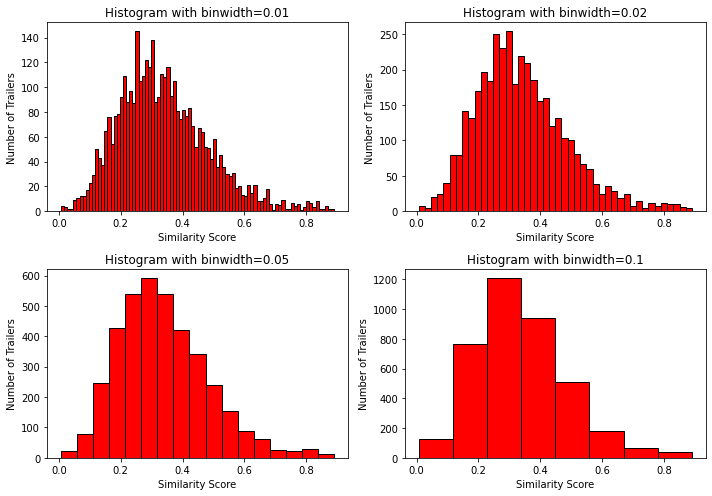

In [8]:
similarity_scores = np.sort(trailers['similarity_score'].values)
range_data = (similarity_scores[-1] - similarity_scores[0])
ax = plt.figure(figsize=(10, 7))
for i, binwidth in enumerate([0.01, 0.02, 0.05, 0.1]):
    ax = plt.subplot(2, 2, i + 1)
    ax.hist(similarity_scores, color='red', edgecolor='black', bins=int(range_data/binwidth))
    ax.set_title(f"Histogram with binwidth={binwidth}")
    ax.set_xlabel("Similarity Score")
    ax.set_ylabel("Number of Trailers")
plt.tight_layout()
plt.show()

<AxesSubplot:>

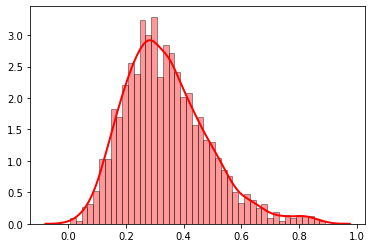

In [9]:
import seaborn as sns
# Density Plot and Histogram of all similarity scores
sns.distplot(similarity_scores, hist=True, kde=True, 
             bins=int(range_data/0.02), color='red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

Text(0, 0.5, 'Density')

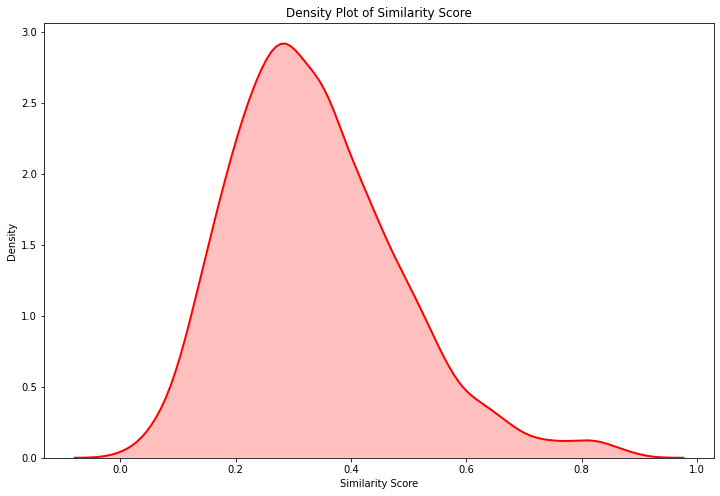

In [10]:
ax = plt.figure(figsize=(12, 8))
sns.distplot(similarity_scores, hist=False, kde=True, color='red', kde_kws={'shade': True, 'linewidth': 2})
plt.title('Density Plot of Similarity Score')
plt.xlabel('Similarity Score')
plt.ylabel('Density')

now let's merge this dataset with the movies dataset

In [11]:
trailers.rename(columns={'title': 'trailer_title', 'release_date': 'trailer_release_date'}, inplace=True)
movies = movies.merge(trailers, on='tmdb_id')
movies.shape

(3839, 25)

In [12]:
movies.sort_values(['view_count'], ascending=False).head()

,movie_id,title,genres,imdb_id,tmdb_id,year,budget,vote_count,vote_average,revenue,...,channel_title,channel_id,description,trailer_release_date,tags,view_count,like_count,dislike_count,comment_count,similarity_score
2071,122912,Avengers: Infinity War,Action|Adventure|Sci-Fi,4154756,299536,2018,300000000.0,19853.0,8.3,2.046240e+09,...,Marvel Entertainment,UCvC4D8onUfXzvjTOM-dBfEA,"""There was an idea…"" Avengers: Infinity War. I...",2017-11-29T13:26:24Z,"['marvel', 'comics', 'comic books', 'nerdy', '...",241537327,3704561,89684,464251,0.394737
578,89745,The Avengers,Action|Adventure|Sci-Fi|IMAX,848228,24428,2012,220000000.0,23243.0,7.7,1.519558e+09,...,Marvel Entertainment,UCvC4D8onUfXzvjTOM-dBfEA,"""There was an idea…"" Avengers: Infinity War. I...",2017-11-29T13:26:24Z,"['marvel', 'comics', 'comic books', 'nerdy', '...",241509922,3704183,89671,464286,0.219415
3438,187541,Incredibles 2,Action|Adventure|Animation|Children,3606756,260513,2018,200000000.0,9166.0,7.6,1.242805e+09,...,Pixar,UC_IRYSp4auq7hKLvziWVH6w,Streaming Now on Disney+ – Sign Up at https://...,2018-04-13T12:00:05Z,"['Pixar', 'Disney', 'Disney Pixar', 'Pixar Mov...",145062854,462140,38716,17143,0.539474
2323,135887,Minions,Adventure|Animation|Children|Comedy,2293640,211672,2015,74000000.0,8307.0,6.4,1.156731e+09,...,FRESH Movie Trailers,UCzNWVDZQ55bjq8uILZ7_wyQ,Hilarious Final TRAILER for Despicable Me's MI...,2015-05-14T18:38:14Z,"['minions', 'minions trailer', 'trailer 2', 'o...",138952310,210316,47263,0,0.304795
2077,122914,Avengers: Endgame,Action|Adventure|Sci-Fi,4154796,299534,2019,356000000.0,15239.0,8.3,2.797801e+09,...,Marvel Entertainment,UCvC4D8onUfXzvjTOM-dBfEA,Whatever it takes. Watch the brand-new trailer...,2019-03-14T12:05:18Z,"['marvel', 'comics', 'avengers', 'avengers end...",138650723,3041163,61624,264451,0.385057


Look's like avengers: infinity war, avengers, incredibles 2, minions, and avengers: endgame, have the most views of the dataset

Now lets add release dates to the dataset to do even more cleaning

In [13]:
release_dates = pd.read_csv("dbs/release_dates_2010s.csv")

In [14]:
movies = movies.merge(release_dates, on='tmdb_id')
movies.head()

,movie_id,title,genres,imdb_id,tmdb_id,year,budget,vote_count,vote_average,revenue,...,tags,view_count,like_count,dislike_count,comment_count,similarity_score,weekday_released,month_released,day_released,year_released
0,73321,The Book of Eli,Action|Adventure|Drama,1037705,20504,2010,80000000.0,4303.0,6.7,157107755.0,...,"['movieclips', 'movie clips', 'movieclipstrail...",1850082,6847,358,533,0.401822,Monday,1,11,2010
1,73321,The Book of Eli,Action|Adventure|Drama,1037705,20504,2010,80000000.0,4303.0,6.7,157107755.0,...,"['the', 'book', 'of', 'eli', 'film', 'official...",3326366,4507,322,1982,0.500000,Monday,1,11,2010
2,73321,The Book of Eli,Action|Adventure|Drama,1037705,20504,2010,80000000.0,4303.0,6.7,157107755.0,...,"['The Book of Daniel', 'Christian Trailer', 'C...",4965302,34031,1539,1327,0.403951,Monday,1,11,2010
3,73321,The Book of Eli,Action|Adventure|Drama,1037705,20504,2010,80000000.0,4303.0,6.7,157107755.0,...,"['el', 'libro', 'de', 'eli', 'trailer', 'españ...",222943,407,34,9,0.100000,Monday,1,11,2010
4,74450,Valentine's Day,Comedy|Romance,817230,32856,2010,52000000.0,2323.0,5.9,216485654.0,...,"['movieclips', 'movieclipstrailers', 'new trai...",1972376,9846,226,264,0.261818,Thursday,2,11,2010


now let's write a function evaluating the different between the trailer release date and the movie release date

In [15]:
import datetime
def release_timeline(series_object):
    day_movie_released = series_object['day_released']
    month_movie_released = series_object['month_released']
    year_movie_released = series_object['year_released']
    trailer_release_date = series_object['trailer_release_date']
    if year_movie_released > 0:
        movie_release_date_rcf3339 = datetime.datetime(year_movie_released, month_movie_released, day_movie_released)
        trailer_release_date = datetime.datetime.strptime(trailer_release_date, '%Y-%m-%dT%H:%M:%SZ')
        return (movie_release_date_rcf3339 - trailer_release_date).days
    return datetime.timedelta().days

In [16]:
movies['release_date_difference'] = movies.apply(release_timeline, axis=1)
release_differences = movies[['title', 'trailer_title', 'trailer_release_date', 'release_date_difference', 'day_released', 'month_released', 'year_released', 'view_count']].sort_values(['release_date_difference'], ascending=False)
release_differences.head()

,title,trailer_title,trailer_release_date,release_date_difference,day_released,month_released,year_released,view_count
3427,Rampage,Rampage - Official Trailer,2010-03-31T18:27:17Z,2934,13,4,2018,411743
3679,Dumbo,Walt Disney Films - Dumbo (1941) - HD Trailer,2011-06-05T11:27:08Z,2853,29,3,2019,815925
2771,The Edge of Seventeen,Edge of Seventeen - Trailer,2009-02-05T01:19:26Z,2842,18,11,2016,506060
3222,mother!,Mother Official HD Trailer - From the Director...,2010-02-02T21:56:37Z,2781,15,9,2017,575501
3574,The Grinch,Dr. Seuss' How The Grinch Stole Christmas | Tr...,2011-04-13T23:58:03Z,2766,9,11,2018,2711230


In [17]:
release_differences.sort_values(['release_date_difference'], ascending=True).head()

,title,trailer_title,trailer_release_date,release_date_difference,day_released,month_released,year_released,view_count
15,Shutter Island,Shutter Island Trailer,2020-10-14T15:56:58Z,-3892,18,2,2010,0
32,Alice in Wonderland,"COME AWAY Trailer (2021) Angelina Jolie, Alice...",2020-10-09T16:50:01Z,-3872,5,3,2010,206852
74,Prince of Persia: The Sands of Time,Prince of Persia: The Sands of Time Remake Off...,2020-09-10T19:10:59Z,-3760,27,5,2010,539123
173,Scott Pilgrim vs. the World,Scott Pilgrim vs The World: Complete Edition -...,2020-09-10T19:38:02Z,-3682,13,8,2010,94779
171,Scott Pilgrim vs. the World,Scott Pilgrim vs. The World: The Game Complete...,2020-09-10T19:26:04Z,-3682,13,8,2010,421281


Let's graph it

In [18]:
difference_in_release_dates = np.sort(np.array([int(days.split()[0]) for days in release_differences['release_date_difference'].astype(str).values]))

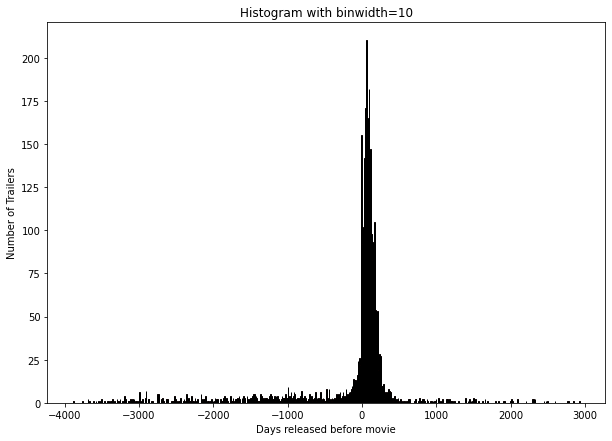

In [19]:
range_data = (difference_in_release_dates[-1] - difference_in_release_dates[0])
plt.figure(figsize=(10, 7))
binwidth = 10
plt.hist(difference_in_release_dates, color='red', edgecolor='black', bins=int(range_data/binwidth))
plt.title(f"Histogram with binwidth={binwidth}")
plt.xlabel("Days released before movie")
plt.ylabel("Number of Trailers")
plt.show()

Text(0, 0.5, 'Density')

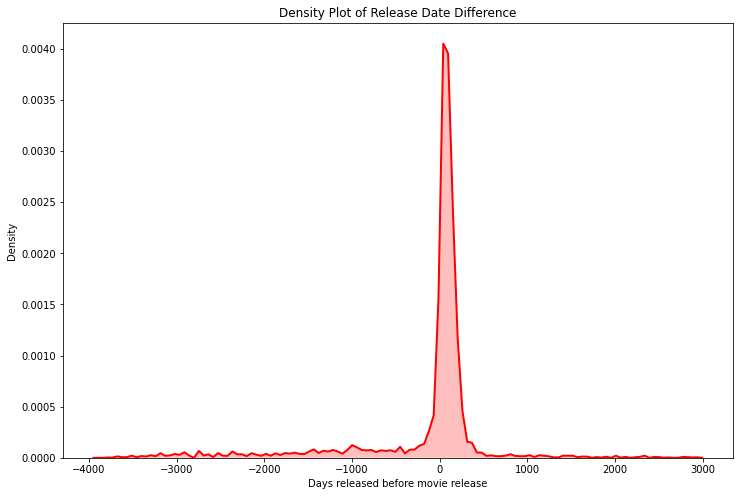

In [20]:
ax = plt.figure(figsize=(12, 8))
sns.distplot(difference_in_release_dates, hist=False, kde=True, color='red', kde_kws={'shade': True, 'linewidth': 2})
plt.title('Density Plot of Release Date Difference')
plt.xlabel('Days released before movie release')
plt.ylabel('Density')

Trying to figure out how to better clean the data...

In [21]:
top_10 = np.percentile(difference_in_release_dates, 90)
lower_10 = np.percentile(difference_in_release_dates, 10)
print(lower_10, top_10)
most_data = difference_in_release_dates[np.where(difference_in_release_dates > lower_10)]
most_data = most_data[np.where(most_data < top_10)]
print(most_data.shape)

-992.0 203.0
(3063,)


Text(0, 0.5, 'Density')

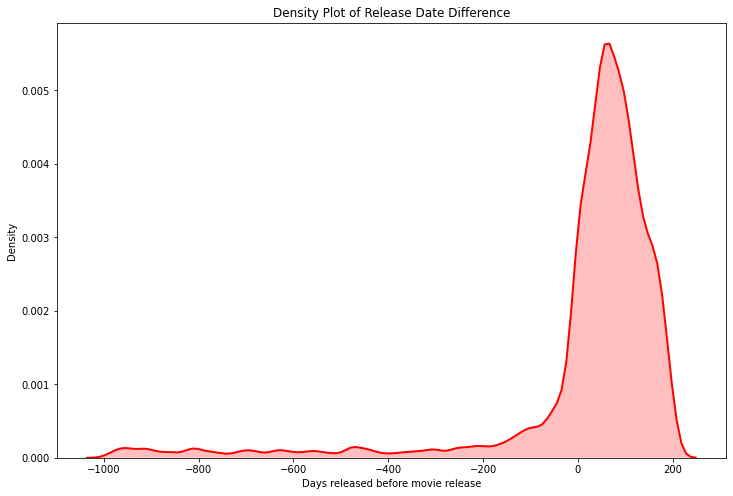

In [22]:
plt.figure(figsize=(12, 8))
sns.distplot(most_data, hist=False, kde=True, color='red', kde_kws={'shade': True, 'linewidth': 2})
plt.title('Density Plot of Release Date Difference')
plt.xlabel('Days released before movie release')
plt.ylabel('Density')

In [23]:
movies = movies.loc[((movies['release_date_difference'] > 0) & (movies['release_date_difference'] < 365))]
movies.to_csv("dbs/trailers_2010s_sample.csv", index=False)

# Evaluating Revenue based on YouTube Trailer Data

In [24]:
dataset = movies[['tmdb_id', 'title', 'view_count', 'like_count', 'dislike_count', 'comment_count', 'revenue']]
features = dataset[['tmdb_id', 'view_count', 'like_count', 'dislike_count', 'comment_count']].groupby(['tmdb_id']).sum()
outputs = dataset[['tmdb_id', 'revenue']].groupby(['tmdb_id']).first()
print(features.shape)
print(outputs.shape)

(650, 4)
(650, 1)


In [25]:
dataset = features.join(outputs, on='tmdb_id')
dataset.head()

,view_count,like_count,dislike_count,comment_count,revenue
tmdb_id,,,,,
189,9997365,30385,1943,2790,3.940762e+07
1771,13296177,65271,1571,8698,3.705698e+08
1865,19923292,56913,1563,11038,1.045714e+09
1930,21112870,74661,7717,26514,7.579307e+08
9543,6151541,13884,682,1470,3.351546e+08


In [26]:
features = dataset.iloc[:, :-1].values
output = dataset.iloc[:, -1].values
print(features)

[[ 9997365    30385     1943     2790]
 [13296177    65271     1571     8698]
 [19923292    56913     1563    11038]
 ...
 [12440652   148991     6470    11431]
 [19518743   118206     5988    10725]
 [13900980    99286     3987     7255]]


In [27]:
print(output)

[3.94076160e+07 3.70569774e+08 1.04571380e+09 7.57930663e+08
 3.35154643e+08 6.23933331e+08 4.15686217e+08 4.94878759e+08
 7.52600867e+08 1.06696970e+09 4.49326618e+08 3.18502923e+08
 2.94804195e+08 1.02546711e+09 9.54305868e+08 1.34151122e+09
 3.71940071e+08 4.93214993e+08 5.43513985e+08 1.57107755e+08
 4.00062763e+08 4.76645590e+07 7.10412550e+07 1.14977104e+08
 5.60328890e+07 9.61889030e+07 8.97925020e+07 4.40933160e+07
 6.98491347e+08 1.51955791e+09 2.15283742e+08 8.25532764e+08
 2.93329073e+08 2.74470394e+08 1.70432927e+08 5.10708070e+07
 2.26497209e+08 2.16485654e+08 1.77238796e+08 1.27233108e+08
 3.00228084e+08 8.21485380e+07 2.60095986e+08 2.78731369e+08
 1.10856101e+09 7.49523050e+07 2.24920315e+08 2.61930431e+08
 1.27869379e+08 3.21885765e+08 4.32022830e+07 1.12379408e+09
 2.71430189e+08 1.05610124e+08 3.57852395e+08 5.92461732e+08
 2.99268508e+08 3.10650585e+08 9.75520500e+07 1.37551594e+08
 2.27817248e+08 3.91877830e+07 6.24026776e+08 5.63749323e+08
 1.49228077e+08 2.117808

In [28]:
# use these variables to plot per-attribute relationship
views = features[:, 0]
likes = features[:, 1]
dislikes = features[:, 2]
comments = features[:, 3]

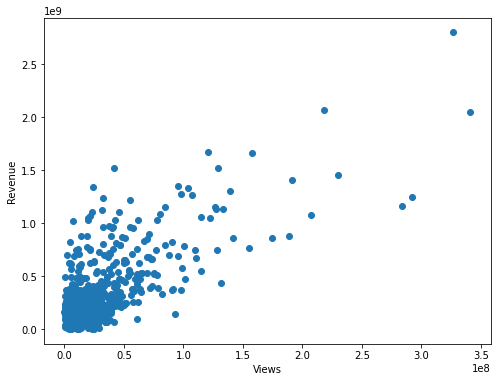

In [29]:
# revenue vs views
plt.figure(figsize=(8, 6))
plt.scatter(views, outputs)
plt.xlabel("Views")
plt.ylabel("Revenue")
plt.show()

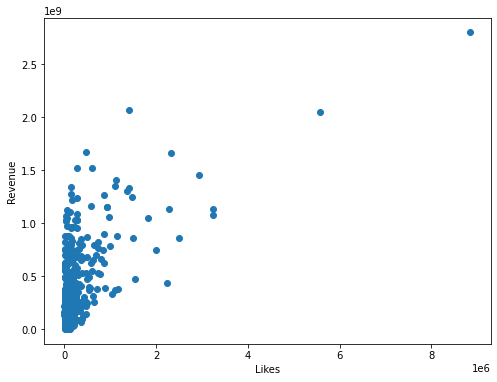

In [30]:
#revenue vs likes
plt.figure(figsize=(8, 6))
plt.scatter(likes, outputs)
plt.xlabel("Likes")
plt.ylabel("Revenue")
plt.show()

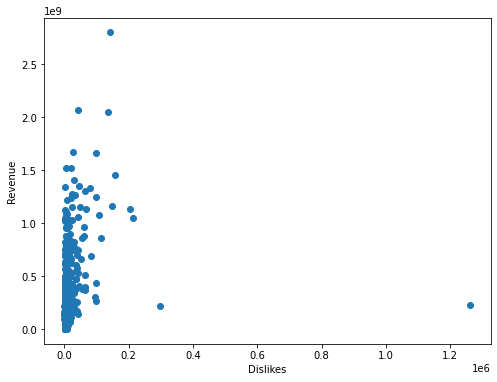

In [31]:
#revenue vs dislikes
plt.figure(figsize=(8, 6))
plt.scatter(dislikes, outputs)
plt.xlabel("Dislikes")
plt.ylabel("Revenue")
plt.show()

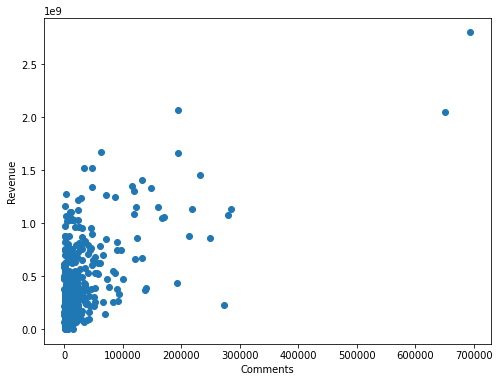

In [32]:
#revenue vs comments
plt.figure(figsize=(8, 6))
plt.scatter(comments, outputs)
plt.xlabel("Comments")
plt.ylabel("Revenue")
plt.show()

In [33]:
movies[movies['comment_count'] == movies['comment_count'].max()]

,movie_id,title,genres,imdb_id,tmdb_id,year,budget,vote_count,vote_average,revenue,...,view_count,like_count,dislike_count,comment_count,similarity_score,weekday_released,month_released,day_released,year_released,release_date_difference
2071,122912,Avengers: Infinity War,Action|Adventure|Sci-Fi,4154756,299536,2018,300000000.0,19853.0,8.3,2.046240e+09,...,241537327,3704561,89684,464251,0.394737,Friday,4,27,2018,148


In [34]:
movies[movies['like_count'] == movies['like_count'].max()]

,movie_id,title,genres,imdb_id,tmdb_id,year,budget,vote_count,vote_average,revenue,...,view_count,like_count,dislike_count,comment_count,similarity_score,weekday_released,month_released,day_released,year_released,release_date_difference
2071,122912,Avengers: Infinity War,Action|Adventure|Sci-Fi,4154756,299536,2018,300000000.0,19853.0,8.3,2.046240e+09,...,241537327,3704561,89684,464251,0.394737,Friday,4,27,2018,148


In [35]:
movies[movies['dislike_count'] == movies['dislike_count'].max()]

,movie_id,title,genres,imdb_id,tmdb_id,year,budget,vote_count,vote_average,revenue,...,view_count,like_count,dislike_count,comment_count,similarity_score,weekday_released,month_released,day_released,year_released,release_date_difference
2696,160080,Ghostbusters,Action|Comedy|Horror|Sci-Fi,1289401,43074,2016,144000000.0,4624.0,5.4,229147509.0,...,46745028,315151,1169850,256864,0.41181,Friday,7,15,2016,133


In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, output, test_size=0.2, random_state=0)

## Predicting Revenue with Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [38]:
pred_linear = regressor.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((pred_linear.reshape(len(pred_linear), 1), y_test.reshape(len(y_test), 1)), axis=1))

[[2.61e+08 2.05e+07]
 [2.19e+08 1.31e+07]
 [2.09e+08 4.45e+07]
 [2.91e+08 3.95e+08]
 [1.98e+08 2.46e+08]
 [2.28e+08 5.50e+07]
 [2.64e+08 1.03e+08]
 [1.66e+08 2.47e+08]
 [1.76e+08 1.00e+08]
 [1.50e+08 1.31e+08]
 [2.30e+08 6.42e+07]
 [3.08e+08 2.88e+08]
 [2.04e+08 1.16e+08]
 [1.59e+08 1.26e+08]
 [2.82e+08 4.44e+06]
 [1.81e+08 8.68e+07]
 [1.49e+08 1.78e+08]
 [2.93e+08 3.26e+08]
 [3.69e+08 4.34e+08]
 [3.46e+08 2.26e+08]
 [1.42e+08 1.49e+08]
 [1.65e+08 1.15e+08]
 [1.86e+08 8.37e+07]
 [3.99e+08 8.09e+08]
 [7.32e+08 5.71e+08]
 [1.11e+09 1.66e+09]
 [3.87e+08 1.03e+09]
 [3.69e+08 1.52e+08]
 [4.44e+08 6.53e+08]
 [2.11e+08 6.95e+07]
 [2.29e+08 4.32e+07]
 [3.30e+08 3.12e+08]
 [7.30e+08 7.83e+08]
 [1.90e+08 6.12e+07]
 [3.62e+08 3.32e+08]
 [1.74e+08 4.50e+07]
 [3.20e+08 2.03e+08]
 [1.48e+08 2.12e+08]
 [3.53e+08 4.03e+08]
 [2.70e+08 1.55e+08]
 [2.07e+08 1.95e+08]
 [9.57e+08 1.06e+09]
 [1.92e+08 5.90e+07]
 [2.63e+08 3.62e+08]
 [2.56e+08 4.03e+07]
 [5.51e+08 5.26e+08]
 [1.51e+08 1.67e+08]
 [2.94e+08 2.

Text(0, 0.5, 'Predicted')

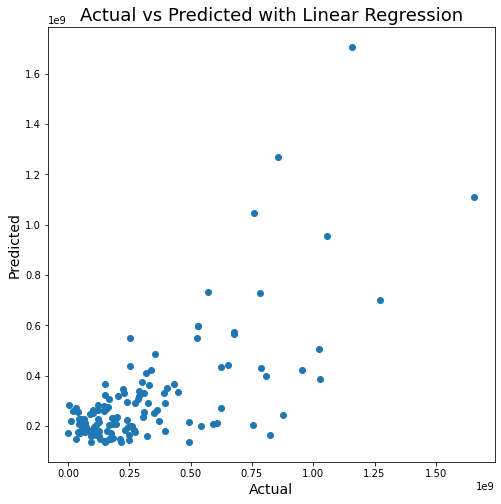

In [39]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, pred_linear)
plt.title("Actual vs Predicted with Linear Regression", fontsize=18)
plt.xlabel("Actual", fontsize=14)
plt.ylabel("Predicted", fontsize=14)

In [40]:
covariance_linear = np.cov(y_test, pred_linear)
covariance_linear

array([[8.83e+16, 4.73e+16],
       [4.73e+16, 5.21e+16]])

In [41]:
from scipy.stats import pearsonr
corr_linear, _ = pearsonr(y_test, pred_linear)
corr_linear

0.6976719304521921

In [42]:
from sklearn.metrics import r2_score
r2_score(y_test, pred_linear)

0.4812713118665344

## training using regression tree

In [43]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train)

DecisionTreeRegressor()

In [44]:
preds_rt = regressor.predict(x_test)

Text(0, 0.5, 'Predicted')

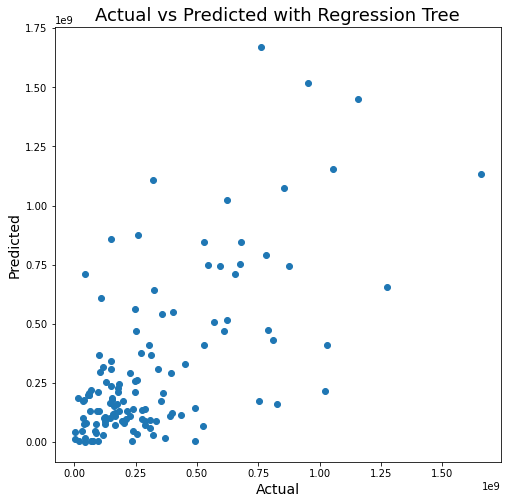

In [45]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, preds_rt)
plt.title("Actual vs Predicted with Regression Tree", fontsize=18)
plt.xlabel("Actual", fontsize=14)
plt.ylabel("Predicted", fontsize=14)

In [46]:
covariance_rt = np.cov(y_test, preds_rt)
covariance_rt

array([[8.83e+16, 6.50e+16],
       [6.50e+16, 1.12e+17]])

In [47]:
corr_rt, _ = pearsonr(y_test, preds_rt)
corr_rt

0.6521625962504906

In [48]:
r2_score(y_test, preds_rt)

0.1974852790462479

Text(0, 0.5, 'Predicted')

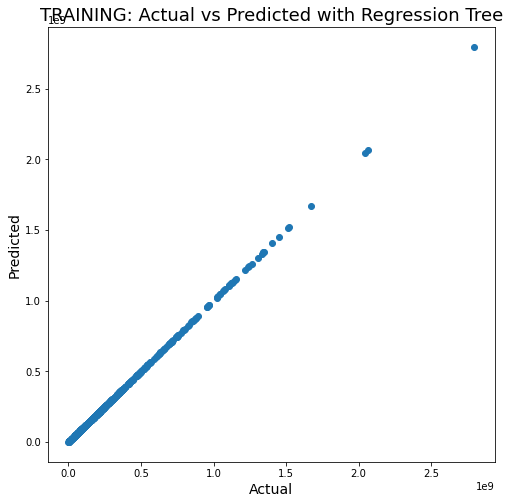

In [49]:
# what is score on training though?
preds_rt_train = regressor.predict(x_train)
plt.figure(figsize=(8, 8))
plt.scatter(y_train, preds_rt_train)
plt.title("TRAINING: Actual vs Predicted with Regression Tree", fontsize=18)
plt.xlabel("Actual", fontsize=14)
plt.ylabel("Predicted", fontsize=14)

In [50]:
# OVERFIT!
corr_rt, _ = pearsonr(y_train, preds_rt_train)
corr_rt

1.0

In [51]:
r2_score(y_train, preds_rt_train)

1.0

## Predicting revenue with Random Forest Regression

In [52]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=20)
regressor.fit(x_train, y_train)

RandomForestRegressor(n_estimators=20)

In [53]:
preds_forest = regressor.predict(x_test)

Text(0, 0.5, 'Predicted')

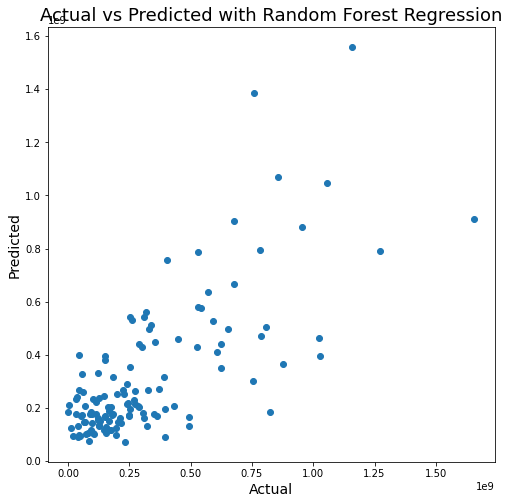

In [54]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, preds_forest)
plt.title("Actual vs Predicted with Random Forest Regression", fontsize=18)
plt.xlabel("Actual", fontsize=14)
plt.ylabel("Predicted", fontsize=14)

In [55]:
corr_rt, _ = pearsonr(y_test, preds_forest)
corr_rt

0.7322475207796662

In [56]:
r2_score(y_test, preds_forest)

0.5170097873803591

That is a bit better, but there is a chance different values for number of trees will impact the success

In [59]:
num_trees_list = np.arange(10, 100, 5)
results_pearson = []
results_r2 = []
for n_trees in num_trees_list:
    regressor_temp = RandomForestRegressor(n_estimators=n_trees)
    regressor_temp.fit(x_train, y_train)
    preds_forest_temp = regressor_temp.predict(x_test)
    corr_temp, _ = pearsonr(y_test, preds_forest_temp)
    results_pearson.append(corr_temp)
    results_r2.append(r2_score(y_test, preds_forest_temp))
results_pearson = np.array(results_pearson)
results_r2 = np.array(results_r2)
table_of_results = np.concatenate((num_trees_list.reshape(len(num_trees_list), 1), results_pearson.reshape(len(results_pearson), 1), results_r2.reshape(len(results_r2), 1)), axis=1)
# table_of_results = np.concatenate((results_pearson, results_r2.reshape(len(results), 1)), axis=1)
print(table_of_results)

[[10.    0.7   0.45]
 [15.    0.74  0.54]
 [20.    0.74  0.52]
 [25.    0.74  0.54]
 [30.    0.74  0.54]
 [35.    0.73  0.52]
 [40.    0.73  0.52]
 [45.    0.73  0.51]
 [50.    0.72  0.5 ]
 [55.    0.73  0.53]
 [60.    0.73  0.51]
 [65.    0.74  0.54]
 [70.    0.73  0.52]
 [75.    0.74  0.54]
 [80.    0.73  0.53]
 [85.    0.74  0.54]
 [90.    0.74  0.54]
 [95.    0.74  0.53]]


So it looks like at best, we can get a correlation coefficient of 0.75. That's not too bad...

## Predicting Revenue with Support Vector Machine

In [60]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x_train_svm = sc_x.fit_transform(x_train)
y_train_svm = sc_y.fit_transform(y_train.reshape(len(y_train), 1))

In [61]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(x_train_svm, y_train_svm)

SVR()

In [62]:
preds_svm = sc_y.inverse_transform(regressor.predict(sc_x.transform(x_test)))

Text(0, 0.5, 'Predicted')

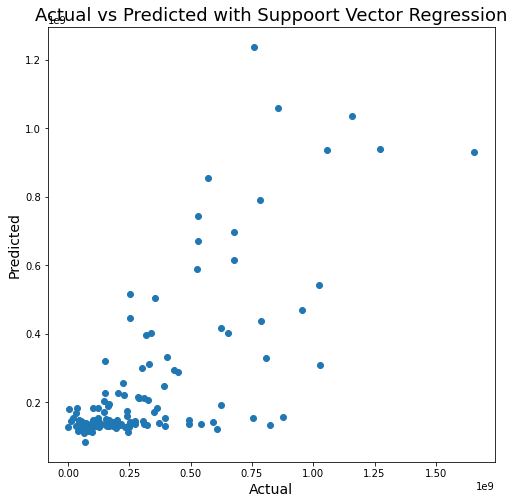

In [63]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, preds_svm)
plt.title("Actual vs Predicted with Suppoort Vector Regression", fontsize=18)
plt.xlabel("Actual", fontsize=14)
plt.ylabel("Predicted", fontsize=14)

In [64]:
corr_rt, _ = pearsonr(y_test, preds_svm)
corr_rt

0.7230124604859914

In [65]:
r2_score(y_test, preds_svm)

0.47525981511759074